<a href="https://colab.research.google.com/github/sainiketh372/Practice_ML_projects/blob/main/Udemy_basic_pro_prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd


In [101]:
data=pd.read_csv('/content/drive/MyDrive/udemy basic pro prac/Stores.csv')

In [102]:
data.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [103]:
data.tail()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610
895,896,1174,1429,1110,54340


In [104]:
data.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [105]:
data.shape

(896, 5)

In [106]:
data['Store_Sales'].idxmax()

649

In [107]:
data.iloc[649]

Store ID                   650
Store_Area                1989
Items_Available           2414
Daily_Customer_Count       860
Store_Sales             116320
Name: 649, dtype: int64

In [108]:
data['Store_Sales'].idxmin()

31

In [109]:
data.iloc[39]

Store ID                   40
Store_Area               1270
Items_Available          1516
Daily_Customer_Count       10
Store_Sales             45480
Name: 39, dtype: int64

In [110]:
data = data.drop("Store ID ", axis="columns")

In [111]:
data.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [112]:
data.duplicated().sum()

0

In [113]:
data.isna().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


In [115]:
data.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [116]:
data.corr()["Store_Sales"].sort_values()

Daily_Customer_Count    0.008629
Store_Area              0.097474
Items_Available         0.098849
Store_Sales             1.000000
Name: Store_Sales, dtype: float64

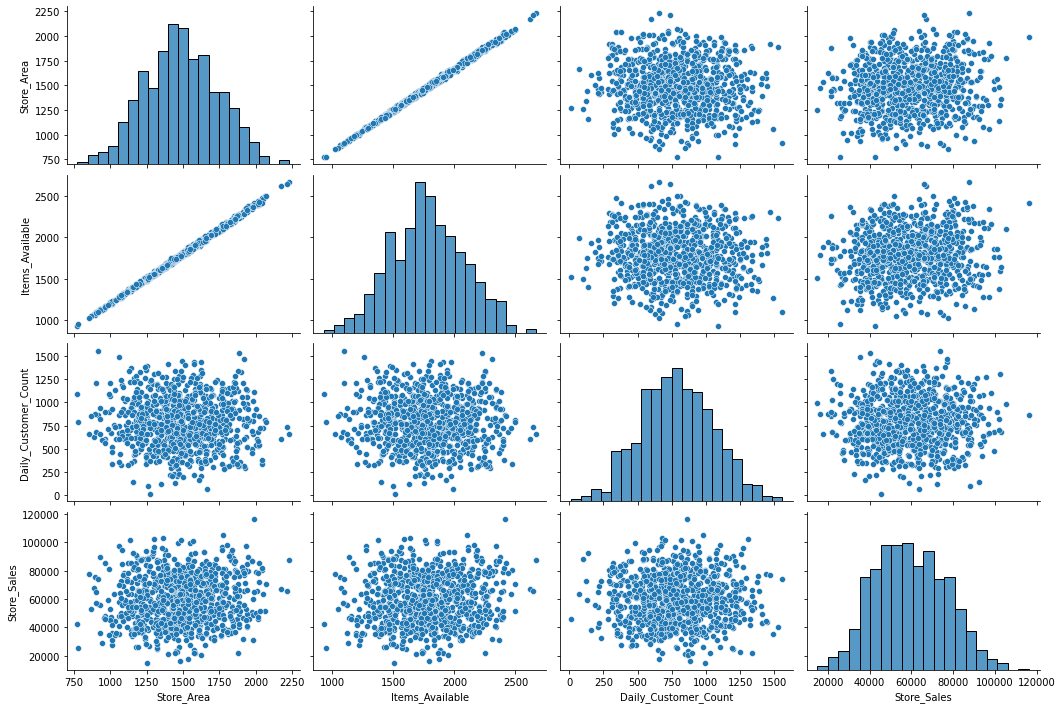

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.pairplot(data,aspect=1.5)
plt.show()

<Figure size 4000x2000 with 0 Axes>

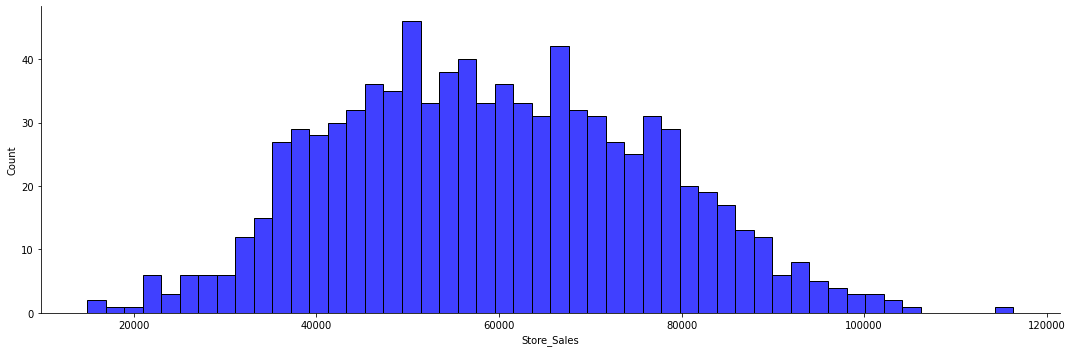

In [118]:
plt.figure(figsize=(20,10),dpi=200)
sns.displot(data=data,x='Store_Sales',bins=50,color='b',aspect=3)

In [119]:
#Feature engineering

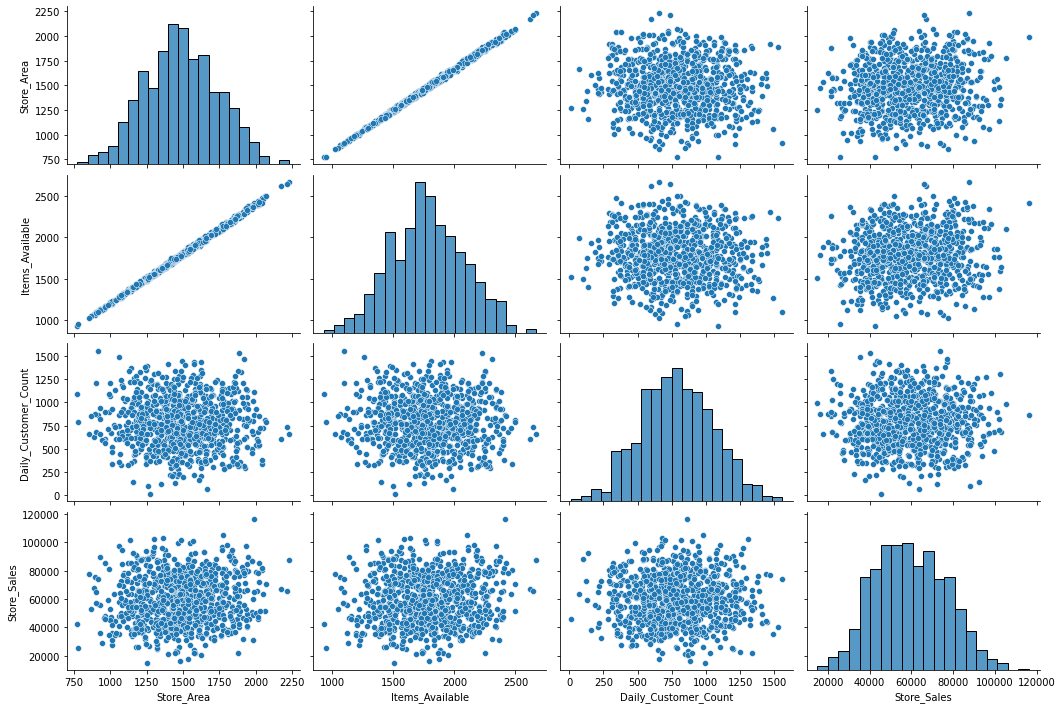

In [120]:
sns.pairplot(data,aspect=1.5)
plt.show()

In [121]:
data.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [122]:
import numpy as np
import sklearn as sk

In [123]:
IQRDailyCustomerCount=970-600
upperline=970+1.5*IQRDailyCustomerCount
lowerline=600-1.5*IQRDailyCustomerCount
data.loc[data['Daily_Customer_Count']>upperline]=np.nan
data.loc[data['Daily_Customer_Count']<lowerline]=np.nan

In [124]:
data=data.dropna()

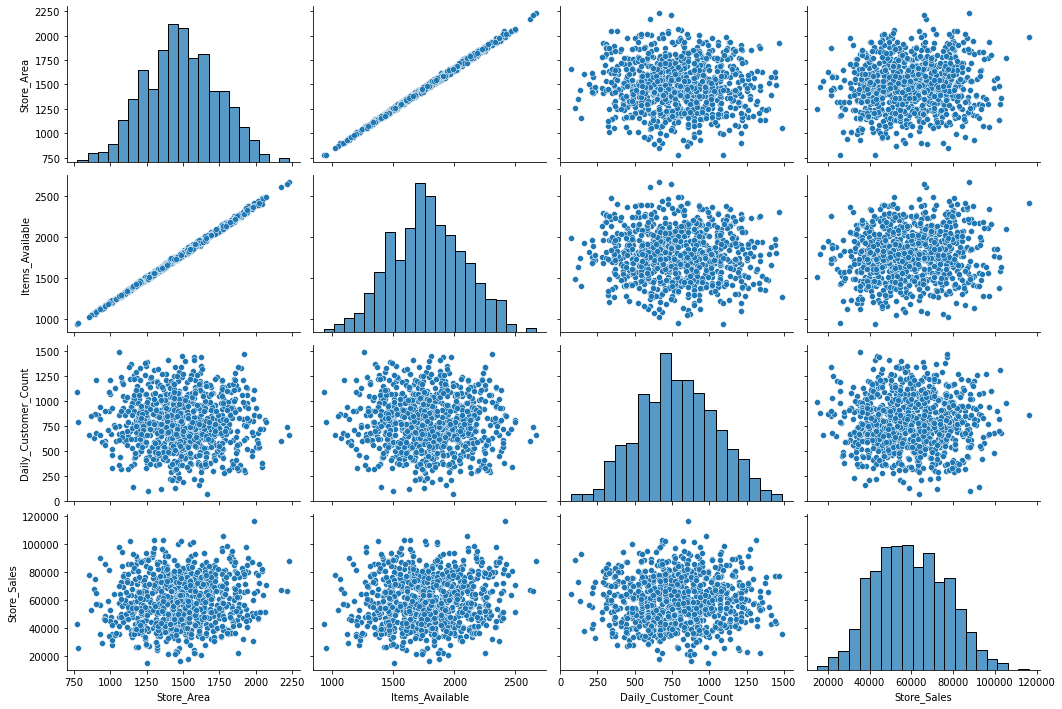

In [125]:
sns.pairplot(data,aspect=1.5)
plt.show()

In [126]:
from matplotlib.colors import XKCD_COLORS
u=data[["Store_Area","Items_Available","Daily_Customer_Count"]]
v=data["Store_Sales"]

In [127]:
from sklearn.model_selection import train_test_split
u_train,u_test,v_train,v_test=train_test_split(u,v,random_state=100,train_size=0.3)


In [128]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
scaled_u_train=Scaler.fit_transform(u_train)
scaled_u_test=Scaler.fit_transform(u_test)

#feature engineering ML

In [129]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [130]:
def modelresults(predictions):
  print("MEan absolute error on model is {}".format(mean_absolute_error(v_test,predictions)))
  print("Root mean squared error on model is {}".format(np.sqrt(mean_squared_error(v_test,predictions))))

In [131]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(scaled_u_train,v_train)
predictionslr=lr.predict(scaled_u_test)
modelresults(predictionslr)

MEan absolute error on model is 14186.002476675187
Root mean squared error on model is 17184.56484675654


In [132]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(scaled_u_train,v_train)
predictionssvr=svr.predict(scaled_u_test)
modelresults(predictionssvr)


MEan absolute error on model is 14245.366736605529
Root mean squared error on model is 17220.606146144837


In [133]:
from sklearn.model_selection import GridSearchCV
svrmodel=SVR()
param_gridsvr={'C':[0.001,0.01,0.1,0.5],'kernel':['linear','rbf','poly'],'gamma':['scale','auto'],'degree':[2,1,4,5]}
gridsvr=GridSearchCV(svrmodel,param_gridsvr)
gridsvr.fit(scaled_u_train,v_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5], 'degree': [2, 1, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [134]:
print("Best parameters for model is {}".format(gridsvr.best_params_))

Best parameters for model is {'C': 0.001, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [135]:
predsgridsvr=gridsvr.predict(scaled_u_test)
modelresults(predsgridsvr)

MEan absolute error on model is 14244.537571209445
Root mean squared error on model is 17219.70017246499


In [136]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(scaled_u_train,v_train)
predsrfr=rfr.predict(scaled_u_test)
modelresults(predsrfr)

MEan absolute error on model is 15283.092332268372
Root mean squared error on model is 18685.572985209503


In [137]:
rfrmodel=RandomForestRegressor()
param_gridrfr={'bootstrap':[True],'max_depth':[5,10,15],'max_features':['auto','log2'],'n_estimators':[2,3,4,5,6]}
gridrfr=GridSearchCV(rfrmodel,param_gridrfr)
gridrfr.fit(scaled_u_train,v_train)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors an

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [2, 3, 4, 5, 6]})

In [138]:
print("best parameters for model is {}".format(gridrfr.best_params_))

best parameters for model is {'bootstrap': True, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 4}


In [140]:
pred=gridrfr.predict(scaled_u_test)
modelresults(pred)

MEan absolute error on model is 15120.119146445237
Root mean squared error on model is 18314.461303938115
